In [1]:
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import sys

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or 

In [5]:
pip install tensorflow==1.0.1

     |████████████████████████████████| 44.5MB 86kB/s 
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [0]:
image_file = 's0_1.jpg'
image_string =tf.gfile.FastGFile(image_file, 'rb').read()
ksize_rows = 224
ksize_cols = 224
strides_rows = 128 # 299
strides_cols = 299 # 299
sess = tf.InteractiveSession()
image = tf.image.decode_image(image_string, channels=3)
ksizes = [1, ksize_rows, ksize_cols, 1] 
strides = [1, strides_rows, strides_cols, 1]
rates = [1, 1, 1, 1] 
padding='VALID'
image = tf.expand_dims(image, 0)
image_patches = tf.extract_image_patches(image, ksizes, strides, rates, padding)

In [0]:
def plot_image_patches1(x,i,j, ksize_rows=224, ksize_cols=224):
  nr = x.shape[1]
  nc = x.shape[2]
  fig= plt.figure()
  plt.axis('off')
  plt.imshow(x[0,i,j,].reshape(ksize_rows, ksize_cols, 3))
  return fig

In [5]:
x=sess.run(image_patches)
print(x.shape, file=sys.stderr)

(1, 7, 3, 150528)


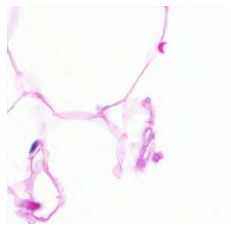

In [6]:
fig = plot_image_patches1(x,0,0)
fig.savefig('image_patches1.png', bbox_inches='tight',dpi=120) # use dpi to control image size, e.g. 800

In [0]:
plt.close(fig)

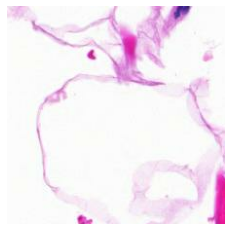

In [8]:
fig = plot_image_patches1(x,0,1)
fig.savefig('image_patches2.png', bbox_inches='tight',dpi=120)

In [0]:
plt.close(fig)

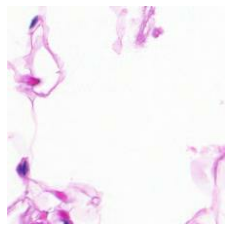

In [10]:
fig = plot_image_patches1(x,1,0)
fig.savefig('image_patches3.png', bbox_inches='tight',dpi=120)

In [0]:
plt.close(fig)

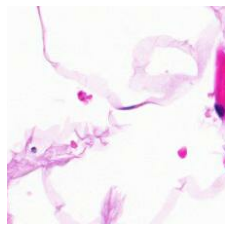

In [12]:
fig = plot_image_patches1(x,1,1)
fig.savefig('image_patches4.png', bbox_inches='tight',dpi=120) # use dpi to control image size, e.g. 800

In [0]:
plt.close(fig)

In [0]:
sess.close()